In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submission = pd.read_csv("sampleSubmission.csv")

In [3]:
train_df

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [3]:
train_df.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [7]:
train_df.corr()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,1.000000,0.070691,0.185463,0.138980,0.146020,0.030707,0.033410,0.136501,0.197418,-0.156082,...,-0.008192,-0.084507,-0.096484,0.097087,-0.215878,0.111519,0.188895,0.139078,0.131737,0.047944
feat_1,0.070691,1.000000,0.031332,-0.027807,-0.027529,0.042973,0.043603,0.298952,0.056321,-0.032285,...,0.049634,-0.008739,0.107947,0.089374,0.020830,0.096851,0.010310,0.037264,0.054777,0.081783
feat_2,0.185463,0.031332,1.000000,0.082573,0.134987,0.020926,0.041343,0.222386,0.019815,-0.025630,...,0.009845,-0.006764,-0.039090,0.047451,-0.047035,0.105527,0.515022,0.026383,-0.008219,0.054593
feat_3,0.138980,-0.027807,0.082573,1.000000,0.583523,0.010880,0.004288,0.001294,-0.053462,-0.063551,...,0.011159,-0.048626,-0.096093,-0.009838,-0.082336,0.174781,-0.015068,-0.012417,0.066921,0.006814
feat_4,0.146020,-0.027529,0.134987,0.583523,1.000000,0.017290,0.014059,0.014490,-0.046184,-0.046250,...,0.005684,-0.033153,-0.071029,0.005055,-0.067484,0.183715,0.009454,-0.010312,0.087631,0.015746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feat_89,0.111519,0.096851,0.105527,0.174781,0.183715,0.119951,0.035042,0.063511,0.007974,-0.019147,...,0.103643,0.053582,-0.011822,0.066008,-0.022552,1.000000,0.027764,0.015917,0.129622,0.030650
feat_90,0.188895,0.010310,0.515022,-0.015068,0.009454,0.004842,0.054034,0.129578,0.026807,-0.020698,...,-0.006013,-0.003931,-0.019803,0.014696,-0.031679,0.027764,1.000000,0.014812,-0.035311,0.039864
feat_91,0.139078,0.037264,0.026383,-0.012417,-0.010312,0.012012,0.012465,0.068506,0.095990,-0.014742,...,-0.003444,-0.023091,-0.024005,0.028850,-0.033653,0.015917,0.014812,1.000000,0.104226,-0.000045
feat_92,0.131737,0.054777,-0.008219,0.066921,0.087631,0.065331,0.015479,-0.032261,0.013608,-0.069707,...,0.048431,-0.043484,-0.049393,0.001424,-0.070120,0.129622,-0.035311,0.104226,1.000000,-0.003653


<AxesSubplot:>

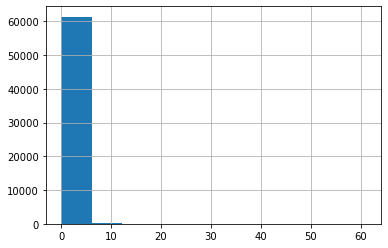

In [4]:
train_df["feat_1"].hist()

In [6]:
train_df[train_df["feat_2"] == 0].shape

(55018, 95)

In [5]:
test_df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [9]:
train_df["target"][train_df["target"] == "Class_1" ] = 0
train_df["target"][train_df["target"] == "Class_2" ] = 1
train_df["target"][train_df["target"] == "Class_3"] = 2
train_df["target"][train_df["target"] == "Class_4" ] = 3
train_df["target"][train_df["target"] == "Class_5" ] = 4
train_df["target"][train_df["target"] == "Class_6"] = 5
train_df["target"][train_df["target"] == "Class_7" ] = 6
train_df["target"][train_df["target"] == "Class_8" ] = 7
train_df["target"][train_df["target"] == "Class_9"] = 8

train_df


<ipython-input-9-2416182bad31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["target"][train_df["target"] == "Class_1" ] = 0
<ipython-input-9-2416182bad31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["target"][train_df["target"] == "Class_2" ] = 1
<ipython-input-9-2416182bad31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["target"][train_df["target"] == "Class_3"] = 2
<ipython-input-9-2416182bad31

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,8
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,8
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,8
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,8


In [10]:
train_df.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [11]:
print(train_df.shape)
print(test_df.shape)

(61878, 95)
(144368, 94)


In [12]:
train_df.dtypes

id          int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
            ...  
feat_90     int64
feat_91     int64
feat_92     int64
feat_93     int64
target     object
Length: 95, dtype: object

In [13]:
train_df["feat_1"].value_counts()

0     51483
1      5906
2      1829
3       981
4       521
5       471
6       207
7       192
8        71
9        55
22       32
11       24
10       15
13       10
15        8
26        6
19        5
24        5
12        5
28        4
14        4
21        4
23        4
17        4
48        3
16        3
27        3
25        3
39        2
31        2
42        2
43        2
30        2
47        2
56        1
20        1
37        1
34        1
29        1
61        1
32        1
40        1
Name: feat_1, dtype: int64

In [14]:
train_df.isnull().sum()

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64

In [15]:
test_df.isnull().sum()

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_89    0
feat_90    0
feat_91    0
feat_92    0
feat_93    0
Length: 94, dtype: int64

In [16]:
import lightgbm as lgb
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits=folds)

In [35]:
lgbm_params = {
    "objective":"regression",
    "random_seed":1234
}

In [19]:
train_X = train_df.drop(["target", "id"], axis=1)
train_Y = train_df["target"]

In [22]:
train_X

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
61874,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,2,0,0,1,0
61875,0,0,0,0,0,0,0,3,1,0,...,0,0,3,1,0,0,0,0,0,0
61876,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3,10,0


In [23]:
train_Y

0        0
1        0
2        0
3        0
4        0
        ..
61873    8
61874    8
61875    8
61876    8
61877    8
Name: target, Length: 61878, dtype: object

In [24]:
train_df_le = train_df[~train_df["target"].isnull()]

In [25]:
train_df_le

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,8
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,8
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,8
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,8


In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = no.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Warning] Unknown parameter: objetive


ValueError: Series.dtypes must be int, float or bool

In [26]:
from sklearn.preprocessing import LabelEncoder

In [28]:
categories = train_df.columns[train_df.dtypes == "object"]
print(categories)

Index(['target'], dtype='object')


In [30]:
for cat in categories:
    le = LabelEncoder()
    le = le.fit(train_df[cat])
    train_df[cat] = le.transform(train_df[cat])

In [31]:
train_X = train_df.drop(["target", "id"], axis=1)
train_Y = train_df["target"]

In [32]:
train_Y

0        0
1        0
2        0
3        0
4        0
        ..
61873    8
61874    8
61875    8
61876    8
61877    8
Name: target, Length: 61878, dtype: int32

In [54]:
models = []


for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    
    
    models.append(model_lgb)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3160
[LightGBM] [Info] Number of data points in the train set: 41252, number of used features: 93
[LightGBM] [Info] Start training from score 5.247843
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 11.3253
[20]	valid_0's l2: 9.30244
[30]	valid_0's l2: 8.47019
[40]	valid_0's l2: 8.10068
[50]	valid_0's l2: 7.96831
[60]	valid_0's l2: 7.89038
[70]	valid_0's l2: 7.8305
[80]	valid_0's l2: 7.80398
[90]	valid_0's l2: 7.78234
[100]	valid_0's l2: 7.74562
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 7.74562
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is no

In [39]:
model_lgb.feature_importance()

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 1])

<AxesSubplot:>

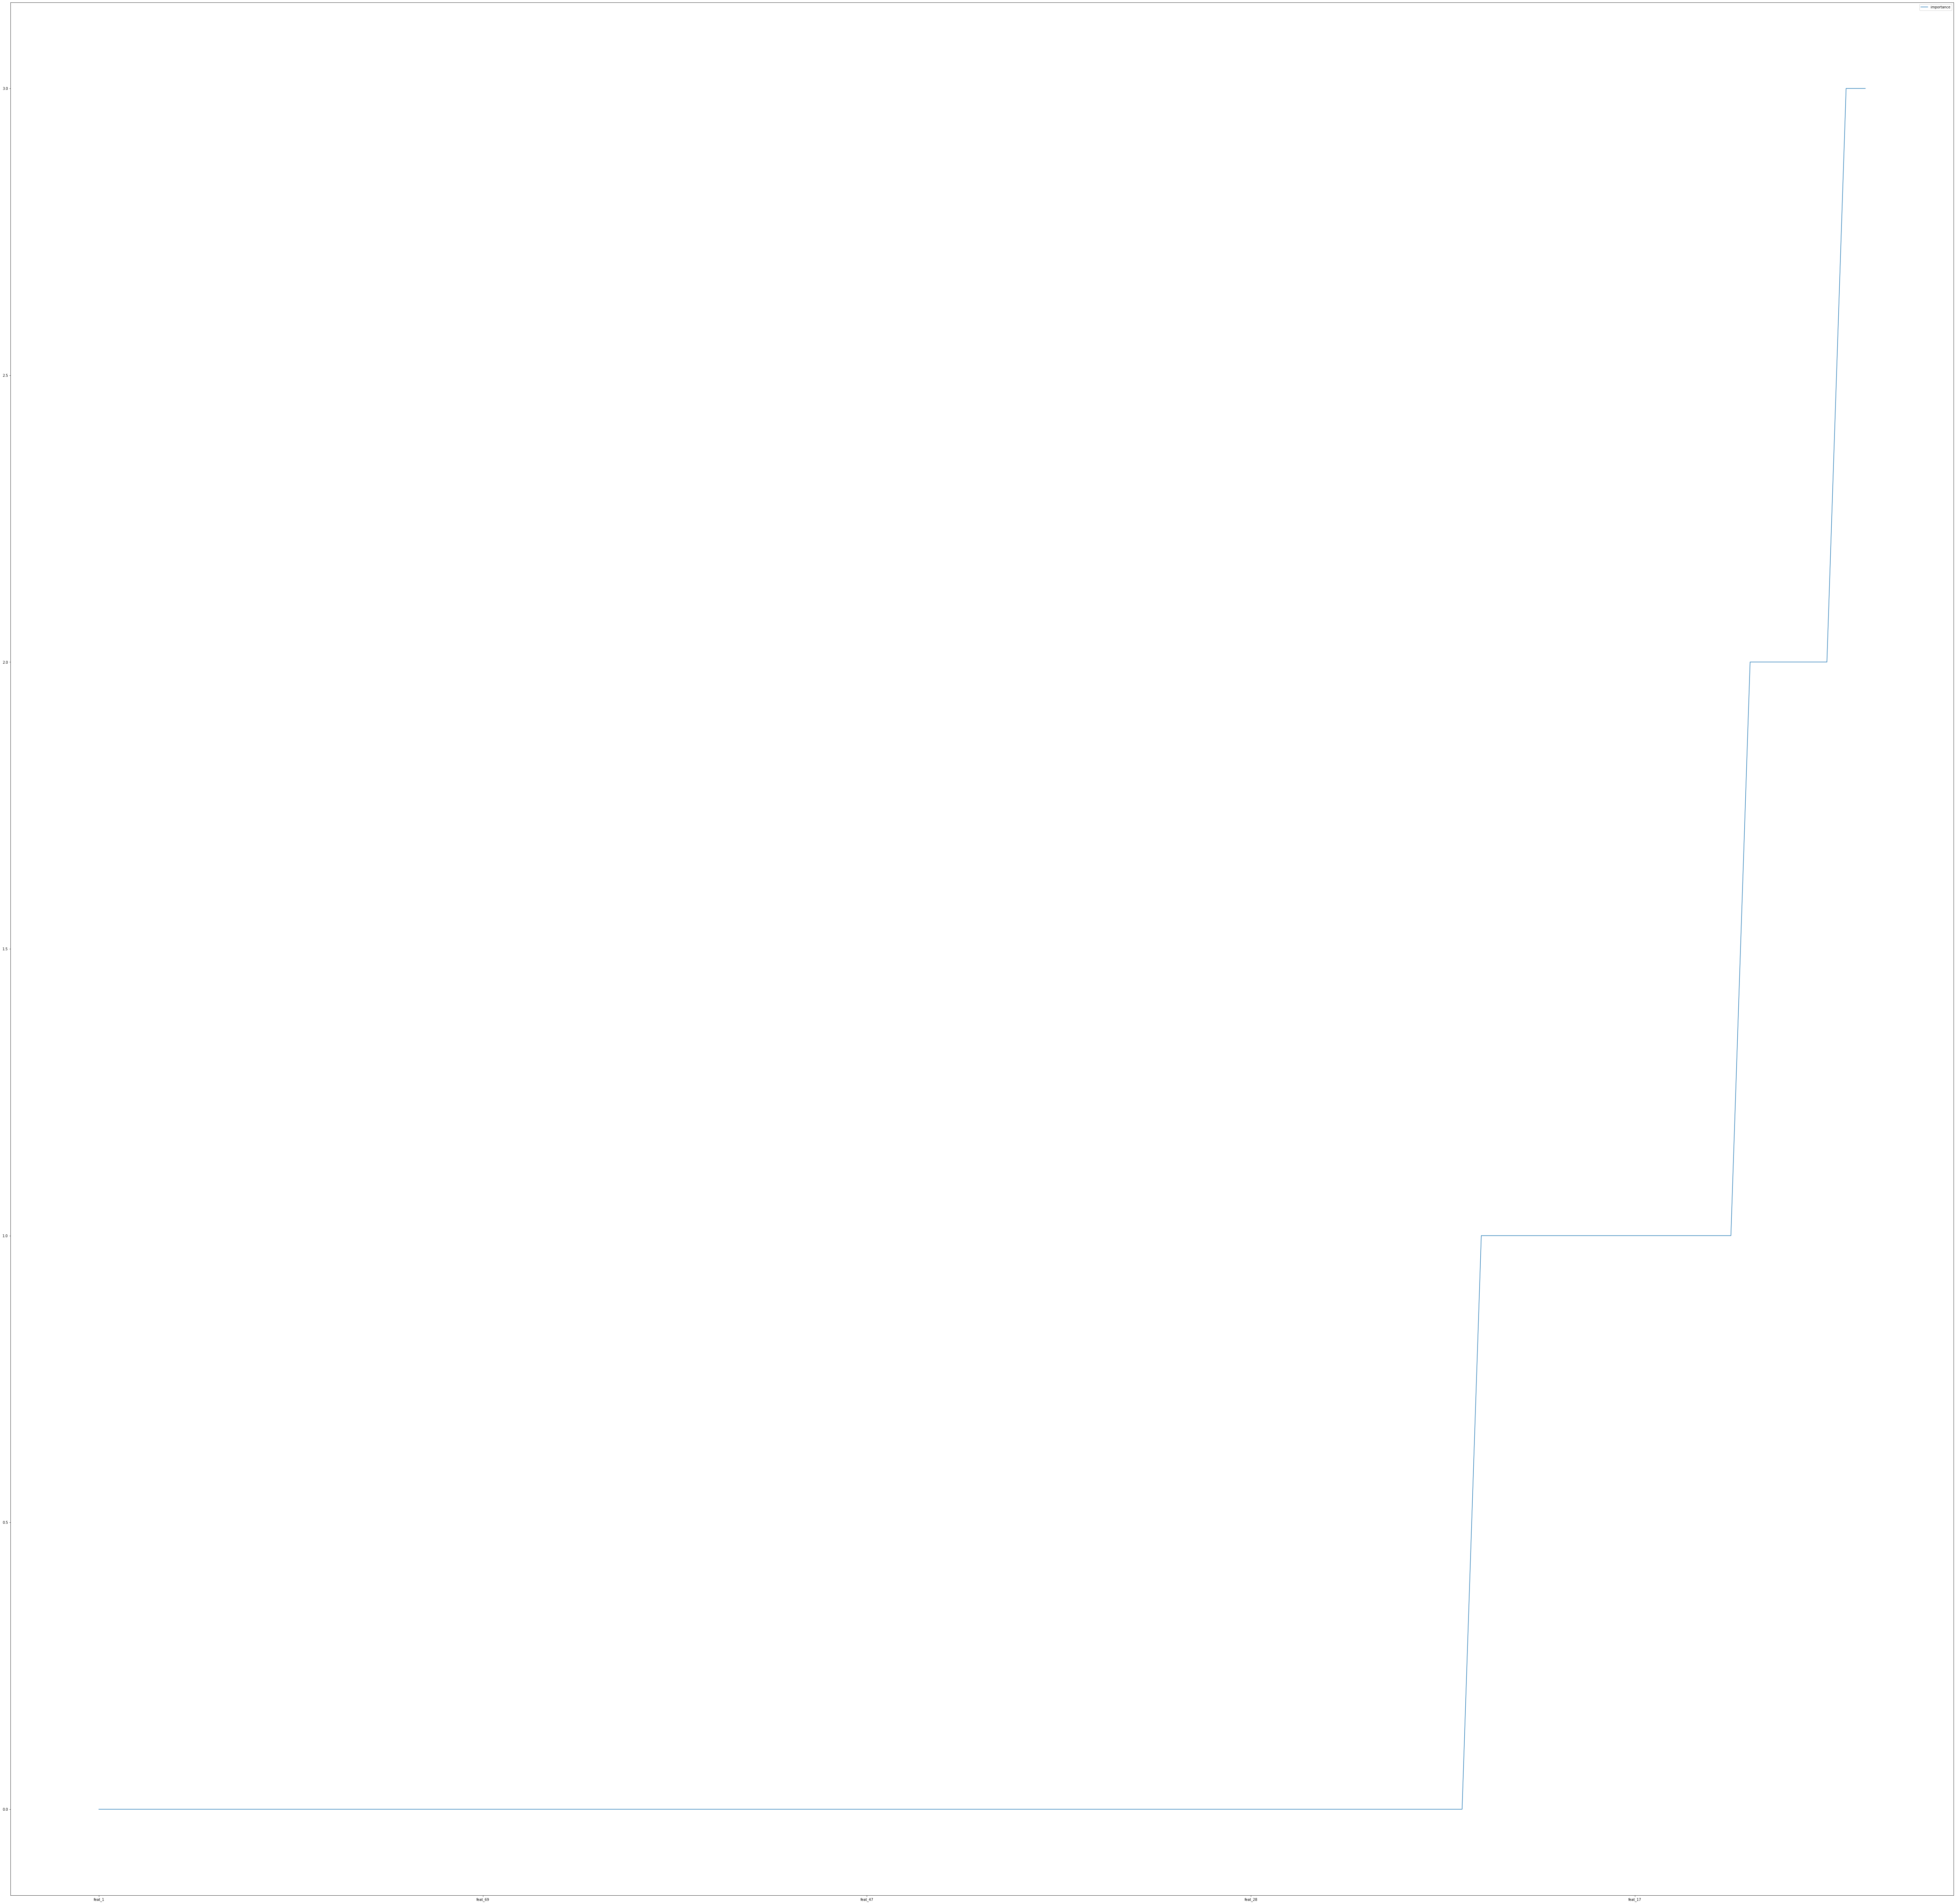

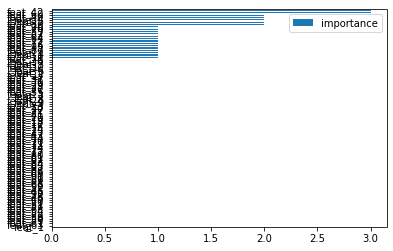

In [53]:
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance",ascending= True)
importance.plot(figsize=(100,100))
importance.plot.barh()

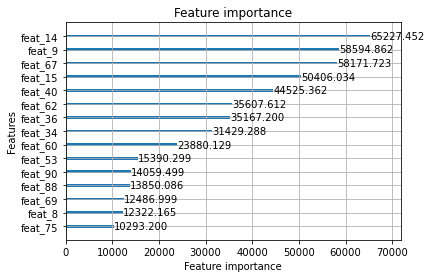

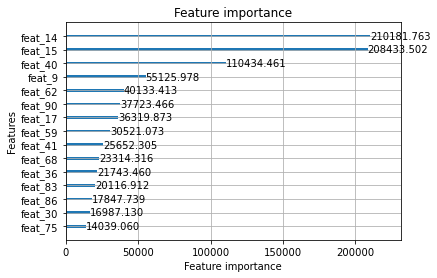

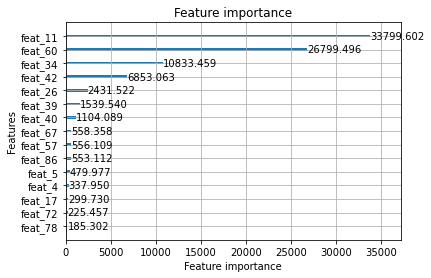

In [55]:
for model in models:
    lgb.plot_importance(model,importance_type="gain",max_num_features=15)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, np.round(y_pred))

0.0

In [59]:
preds = []

for model in models:
    pred = model.predict(test_df)
    preds.append(pred)

LightGBMError: The number of features in data (94) is not the same as it was in training data (93).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

In [60]:
test_df

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144363,144364,0,0,0,0,0,0,0,0,0,...,0,0,2,1,1,0,0,0,0,0
144364,144365,0,0,0,0,0,0,0,0,0,...,0,1,4,1,11,0,0,0,0,0
144365,144366,0,1,0,0,0,0,1,1,0,...,0,1,3,1,1,0,0,1,0,0
144366,144367,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,1,0


In [63]:
test_X

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144363,0,0,0,0,0,0,0,0,0,1,...,0,0,2,1,1,0,0,0,0,0
144364,0,0,0,0,0,0,0,0,0,0,...,0,1,4,1,11,0,0,0,0,0
144365,0,1,0,0,0,0,1,1,0,0,...,0,1,3,1,1,0,0,1,0,0
144366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,1,0


In [82]:
preds = []
cnt=0
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)
    cnt=cnt+1
print(cnt)

3


In [66]:
preds

[array([2.40626396, 5.24940894, 5.16297374, ..., 2.22503921, 2.3775774 ,
        3.15360657]),
 array([2.79671541, 3.37830131, 5.13930692, ..., 2.74029361, 2.14518156,
        2.35999888]),
 array([2.40588956, 2.66231544, 2.67942353, ..., 2.30906951, 2.34395249,
        2.34395249])]

In [90]:
preds = np.round(preds)

In [91]:
preds

array([[2., 5., 5., ..., 2., 2., 3.],
       [3., 3., 5., ..., 3., 2., 2.],
       [2., 3., 3., ..., 2., 2., 2.]])

In [92]:
submission["target"] = preds[0]

In [93]:
submission

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,target
0,1,1,0,0,0,0,0,0,0,0,2.0
1,2,1,0,0,0,0,0,0,0,0,5.0
2,3,1,0,0,0,0,0,0,0,0,5.0
3,4,1,0,0,0,0,0,0,0,0,3.0
4,5,1,0,0,0,0,0,0,0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
144363,144364,1,0,0,0,0,0,0,0,0,6.0
144364,144365,1,0,0,0,0,0,0,0,0,3.0
144365,144366,1,0,0,0,0,0,0,0,0,2.0
144366,144367,1,0,0,0,0,0,0,0,0,2.0


In [3]:
submission[submission["target"] == 0.0]

NameError: name 'submission' is not defined

In [87]:
len(preds[0])

144368

In [ ]:
train_df["target"][train_df["target"] == "Class_1" ] = 0
train_df["target"][train_df["target"] == "Class_2" ] = 1
train_df["target"][train_df["target"] == "Class_3"] = 2
train_df["target"][train_df["target"] == "Class_4" ] = 3
train_df["target"][train_df["target"] == "Class_5" ] = 4
train_df["target"][train_df["target"] == "Class_6"] = 5
train_df["target"][train_df["target"] == "Class_7" ] = 6
train_df["target"][train_df["target"] == "Class_8" ] = 7
train_df["target"][train_df["target"] == "Class_9"] = 8


In [98]:
submission["Class_1"] = 0

In [99]:
submission["Class_1"][submission["target"] == 1.0] = 1
submission["Class_2"][submission["target"] == 2.0] = 1
submission["Class_3"][submission["target"] == 3.0] = 1
submission["Class_4"][submission["target"] == 4.0] = 1
submission["Class_5"][submission["target"] == 5.0] = 1
submission["Class_6"][submission["target"] == 6.0] = 1
submission["Class_7"][submission["target"] == 7.0] = 1
submission["Class_8"][submission["target"] == 8.0] = 1
submission["Class_9"][submission["target"] == 9.0] = 1

<ipython-input-99-abc9f6ea08ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["Class_1"][submission["target"] == 1.0] = 1
<ipython-input-99-abc9f6ea08ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["Class_2"][submission["target"] == 2.0] = 1
<ipython-input-99-abc9f6ea08ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["Class_3"][submission["target"] == 3.0] = 1
<ipython-input-99-abc9f6ea08ae>

In [100]:
submission

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,target
0,1,0,1,0,0,0,0,0,0,0,2.0
1,2,0,0,0,0,1,0,0,0,0,5.0
2,3,0,0,0,0,1,0,0,0,0,5.0
3,4,0,0,1,0,0,0,0,0,0,3.0
4,5,0,0,0,0,0,0,1,0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
144363,144364,0,0,0,0,0,1,0,0,0,6.0
144364,144365,0,0,1,0,0,0,0,0,0,3.0
144365,144366,0,1,0,0,0,0,0,0,0,2.0
144366,144367,0,1,0,0,0,0,0,0,0,2.0


In [102]:
submission = submission.drop(["target"], axis=1)

In [103]:
submission

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0,1,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0
3,4,0,0,1,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
144363,144364,0,0,0,0,0,1,0,0,0
144364,144365,0,0,1,0,0,0,0,0,0
144365,144366,0,1,0,0,0,0,0,0,0
144366,144367,0,1,0,0,0,0,0,0,0


In [105]:
submission.to_csv("submit01.csv",index=False)